#📌 Extracción

In [1]:
#Se monta el disco de Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Importando la biblioteca Pandas
import pandas as pd

In [3]:
#Importando el archivo con la data respectiva (En mi caso cargue los archivos en la carpeta Colab Notebooks de mi Google Drive)
ruta_archivo = '/content/drive/My Drive/Colab Notebooks/TelecomX_Data.json'
df = pd.read_json(ruta_archivo)

In [4]:
#Leyendo los primeros 5 registros del archivo recien importado que de ahora en adelante se llamará df
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [5]:
#Analizando el tipo de datos existentes en DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [6]:
#Se detecta que son 6 columnas de las cuales hay 4 columnas anidadas por lo que con el siguiente codigo se procede a normalizar
customer = pd.json_normalize(df['customer'])
phone = pd.json_normalize(df['phone'])
internet = pd.json_normalize(df['internet'])
account = pd.json_normalize(df['account'])

In [7]:
#Con las Columnas normalizadas se procede a agregar al df original para una lectura completa
df = pd.concat([df, customer, phone, internet, account], axis=1)

df.sample(5)

,customerID,Churn,customer,phone,internet,account,gender,SeniorCitizen,Partner,Dependents,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
7249,9968-FFVVH,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Male,0,No,No,...,Yes,Yes,Yes,No,No,One year,No,Bank transfer (automatic),68.80,4111.35
3738,5146-YYFRZ,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Two year', 'PaperlessBilling': '...",Male,0,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.95,1311.75
5635,7694-VLBWQ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'One year', 'PaperlessBilling': '...",Male,0,Yes,No,...,Yes,Yes,No,Yes,Yes,One year,No,Electronic check,104.10,7040.85
3477,4815-TUMEQ,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.30,185.2
1842,2621-UDNLU,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,0,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.85,72


In [8]:
#Ahora se eliminan las columnas anidadas que se encuentran en el DF luego de extraer la información

datos = df.drop(['customer', 'phone', 'internet', 'account'], axis=1)

In [9]:
#Validacion de los cambios
datos.sample(5)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
6852,9451-WLYRI,No,Female,0,Yes,No,53,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.05,990.45
3573,4923-ADWXJ,No,Female,0,No,No,25,Yes,No,DSL,...,Yes,No,Yes,No,Yes,Month-to-month,Yes,Bank transfer (automatic),65.80,1679.65
3316,4625-EWPTF,Yes,Male,0,No,No,8,No,No phone service,DSL,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,30.45,226.45
4571,6261-LHRTG,No,Female,0,No,No,26,Yes,No,DSL,...,Yes,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),54.75,1406.9
3570,4919-IKATY,Yes,Male,0,Yes,Yes,5,Yes,Yes,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,84.50,453.75


#🔧 Transformación

Comprender la estructura del dataset y el significado de sus columnas. Esta etapa servirá para identificar qué variables son más relevantes para el análisis de evasión de clientes.

*- Explorar las columnas del dataset y verificar sus tipos de datos.

*- Consultar el diccionario para comprender mejor el significado de las variables.

*- Identificar las columnas más relevantes para el análisis de evasión.

In [10]:
#Se procede a validar la informacion existente en las columnas
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [11]:
#La columna Charges.Total debería ser una columna tipo float se procede a explorar la columna
datos['Charges.Total'].value_counts()

,count
Charges.Total,
20.2,11
,11
19.75,9
19.55,9
19.9,9
...,...
1993.2,1
72.1,1
1237.85,1


In [12]:
import numpy as np
datos['Charges.Total'] = datos['Charges.Total'].str.replace(',', '').replace('$', '').replace(' ', '').replace('', None) #Eliminar caracteres innecesarios
datos['Charges.Total'] = datos['Charges.Total'].astype(np.float64) #Se convierte a tipo float64
datos['Charges.Total'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7267 entries, 0 to 7266
Series name: Charges.Total
Non-Null Count  Dtype  
--------------  -----  
7256 non-null   float64
dtypes: float64(1)
memory usage: 56.9 KB


In [13]:
datos['Charges.Total'].isna().value_counts()

,count
Charges.Total,
False,7256
True,11


In [14]:
#Valido las Filas vacías
total_nulos = datos['Charges.Total'].isna()
datos[total_nulos]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN


In [15]:
#Al no ser información relevante se eliminan las filas
datos = datos.drop(datos[total_nulos].index, axis = 0)
datos = datos.reset_index(drop=True)
datos.value_counts().sum()

np.int64(7256)

In [16]:
#Validamos nuevamente
datos['Charges.Total'].isna().value_counts()

,count
Charges.Total,
False,7256


In [17]:
datos.sample(5)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
1900,2690-DVRVK,No,Male,0,Yes,Yes,5,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,20.55,99.45
931,1310-QRITU,No,Female,0,No,No,18,Yes,Yes,DSL,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,50.30,913.30
7154,9848-JQJTX,No,Male,0,No,No,72,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),100.90,7459.05
6134,8404-VLQFB,No,Female,0,Yes,Yes,15,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,25.25,394.85
5652,7734-DBOAI,Yes,Female,0,Yes,Yes,1,No,No phone service,DSL,...,No,No,Yes,Yes,No,Month-to-month,No,Electronic check,40.10,40.10


In [18]:
datos.nunique()

,0
customerID,7256
Churn,3
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,72
PhoneService,2
MultipleLines,3
InternetService,3


In [19]:
#Se revisarán columnas con mas de 2 datos
col_revisar = datos[['Churn','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']]

In [20]:
for col in col_revisar:
    print(f"\n--- {col} ---")
    print(datos[col].value_counts())


--- Churn ---
Churn
No     5163
Yes    1869
        224
Name: count, dtype: int64

--- MultipleLines ---
MultipleLines
No                  3490
Yes                 3061
No phone service     705
Name: count, dtype: int64

--- InternetService ---
InternetService
Fiber optic    3198
DSL            2483
No             1575
Name: count, dtype: int64

--- OnlineSecurity ---
OnlineSecurity
No                     3607
Yes                    2074
No internet service    1575
Name: count, dtype: int64

--- OnlineBackup ---
OnlineBackup
No                     3181
Yes                    2500
No internet service    1575
Name: count, dtype: int64

--- DeviceProtection ---
DeviceProtection
No                     3194
Yes                    2487
No internet service    1575
Name: count, dtype: int64

--- TechSupport ---
TechSupport
No                     3581
Yes                    2100
No internet service    1575
Name: count, dtype: int64

--- StreamingTV ---
StreamingTV
No                     2895
Y

In [21]:
# Se definen los diccionarios con la información de cada fila siendo convertidos en binarios

mapeos = {
   #Cuando exista "Yes" -> 1 "No" -> 0
    'Churn': {'Yes': 1, 'No': 0},
    'Partner': {'Yes': 1, 'No': 0},
    'Dependents': {'Yes': 1, 'No': 0},
    'PhoneService': {'Yes': 1, 'No': 0},
    'PaperlessBilling': {'Yes': 1, 'No': 0},
    'MultipleLines': {'Yes': 1, 'No': 0, 'No phone service': 0},
    'OnlineSecurity': {'Yes': 1, 'No': 0, 'No internet service': 0},
    'OnlineBackup': {'Yes': 1, 'No': 0, 'No internet service': 0}, #
    'DeviceProtection': {'Yes': 1, 'No': 0, 'No internet service': 0},
    'TechSupport': {'Yes': 1, 'No': 0, 'No internet service': 0},
    'StreamingTV': {'Yes': 1, 'No': 0, 'No internet service': 0},
    'StreamingMovies': {'Yes': 1, 'No': 0, 'No internet service': 0},
    'gender' : {'Female': 1, 'Male': 0}
        }



# Aplico el mapeos con la herramienta .replace()
datos.replace(mapeos, inplace=True)


# Se Verifica nuevamente

datos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7256 non-null   object 
 1   Churn             7256 non-null   object 
 2   gender            7256 non-null   int64  
 3   SeniorCitizen     7256 non-null   int64  
 4   Partner           7256 non-null   int64  
 5   Dependents        7256 non-null   int64  
 6   tenure            7256 non-null   int64  
 7   PhoneService      7256 non-null   int64  
 8   MultipleLines     7256 non-null   int64  
 9   InternetService   7256 non-null   object 
 10  OnlineSecurity    7256 non-null   int64  
 11  OnlineBackup      7256 non-null   int64  
 12  DeviceProtection  7256 non-null   int64  
 13  TechSupport       7256 non-null   int64  
 14  StreamingTV       7256 non-null   int64  
 15  StreamingMovies   7256 non-null   int64  
 16  Contract          7256 non-null   object 


/tmp/ipython-input-21-1100138067.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos.replace(mapeos, inplace=True)


In [22]:
#Se Analiza la Columna Churn
datos['Churn'].value_counts()

,count
Churn,
0,5163
1,1869
,224


In [23]:
#El analisis indica que existen 224 filas vacilas por lo que se proceden a revisar

churn_vacio = datos['Churn'].str.strip() == ''
datos[churn_vacio]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
30,0047-ZHDTW,,1,0,0,0,11,1,1,Fiber optic,...,0,0,0,0,0,Month-to-month,1,Bank transfer (automatic),79.00,929.30
75,0120-YZLQA,,0,0,0,0,71,1,0,No,...,0,0,0,0,0,Two year,1,Credit card (automatic),19.90,1355.10
96,0154-QYHJU,,0,0,0,0,29,1,0,DSL,...,1,0,1,0,0,One year,1,Electronic check,58.75,1696.20
98,0162-RZGMZ,,1,1,0,0,5,1,0,DSL,...,1,0,1,0,0,Month-to-month,0,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,0,1,1,0,65,1,1,Fiber optic,...,1,1,0,1,1,One year,1,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7147,9840-GSRFX,,1,0,0,0,14,1,1,DSL,...,1,0,0,0,0,One year,1,Mailed check,54.25,773.20
7169,9872-RZQQB,,1,0,1,0,49,0,0,DSL,...,0,0,0,1,0,Month-to-month,0,Bank transfer (automatic),40.65,2070.75
7200,9920-GNDMB,,0,0,0,0,9,1,1,Fiber optic,...,0,0,0,0,0,Month-to-month,1,Electronic check,76.25,684.85
7228,9955-RVWSC,,1,0,1,1,67,1,0,No,...,0,0,0,0,0,Two year,1,Bank transfer (automatic),19.25,1372.90


In [24]:
print(datos[churn_vacio].nunique())

customerID          224
Churn                 1
gender                2
SeniorCitizen         2
Partner               2
Dependents            2
tenure               64
PhoneService          2
MultipleLines         2
InternetService       3
OnlineSecurity        2
OnlineBackup          2
DeviceProtection      2
TechSupport           2
StreamingTV           2
StreamingMovies       2
Contract              3
PaperlessBilling      2
PaymentMethod         4
Charges.Monthly     188
Charges.Total       223
dtype: int64


In [25]:
datos.loc[churn_vacio, 'Churn'] = 0

In [26]:
#Se cambia el tipo de la columna Churn
datos['Churn'] = datos['Churn'].astype(np.int64)
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7256 non-null   object 
 1   Churn             7256 non-null   int64  
 2   gender            7256 non-null   int64  
 3   SeniorCitizen     7256 non-null   int64  
 4   Partner           7256 non-null   int64  
 5   Dependents        7256 non-null   int64  
 6   tenure            7256 non-null   int64  
 7   PhoneService      7256 non-null   int64  
 8   MultipleLines     7256 non-null   int64  
 9   InternetService   7256 non-null   object 
 10  OnlineSecurity    7256 non-null   int64  
 11  OnlineBackup      7256 non-null   int64  
 12  DeviceProtection  7256 non-null   int64  
 13  TechSupport       7256 non-null   int64  
 14  StreamingTV       7256 non-null   int64  
 15  StreamingMovies   7256 non-null   int64  
 16  Contract          7256 non-null   object 


In [27]:
#Puede ser de utilidad la herramienta get_dummies para asi separar las columnas

#InternetService
datos = pd.get_dummies(datos, columns=['InternetService'], prefix=' ', dummy_na=False)

# Contract
datos = pd.get_dummies(datos, columns=['Contract'], prefix=' ', dummy_na=False)

# PaymentMethod
datos = pd.get_dummies(datos, columns=['PaymentMethod'], prefix=' ', dummy_na=False)

datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   customerID                   7256 non-null   object 
 1   Churn                        7256 non-null   int64  
 2   gender                       7256 non-null   int64  
 3   SeniorCitizen                7256 non-null   int64  
 4   Partner                      7256 non-null   int64  
 5   Dependents                   7256 non-null   int64  
 6   tenure                       7256 non-null   int64  
 7   PhoneService                 7256 non-null   int64  
 8   MultipleLines                7256 non-null   int64  
 9   OnlineSecurity               7256 non-null   int64  
 10  OnlineBackup                 7256 non-null   int64  
 11  DeviceProtection             7256 non-null   int64  
 12  TechSupport                  7256 non-null   int64  
 13  StreamingTV       

In [28]:
#Se convierten las columnas a tipo Entero
for col in datos.columns:
    if datos[col].dtype == bool:
        datos[col] = datos[col].astype(int)

datos.sample(3)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,...,_DSL,_Fiber optic,_No,_Month-to-month,_One year,_Two year,_Bank transfer (automatic),_Credit card (automatic),_Electronic check,_Mailed check
3085,4307-KWMXE,0,0,0,0,0,10,0,0,0,...,1,0,0,1,0,0,0,0,1,0
5329,7293-LSCDV,0,1,0,1,1,60,1,0,0,...,0,0,1,0,0,1,0,1,0,0
5185,7094-MSZAO,0,0,0,1,1,10,1,0,0,...,0,0,1,1,0,0,0,1,0,0


In [29]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   customerID                   7256 non-null   object 
 1   Churn                        7256 non-null   int64  
 2   gender                       7256 non-null   int64  
 3   SeniorCitizen                7256 non-null   int64  
 4   Partner                      7256 non-null   int64  
 5   Dependents                   7256 non-null   int64  
 6   tenure                       7256 non-null   int64  
 7   PhoneService                 7256 non-null   int64  
 8   MultipleLines                7256 non-null   int64  
 9   OnlineSecurity               7256 non-null   int64  
 10  OnlineBackup                 7256 non-null   int64  
 11  DeviceProtection             7256 non-null   int64  
 12  TechSupport                  7256 non-null   int64  
 13  StreamingTV       

In [30]:
col_grupo1 = [' _No', ' _DSL', ' _Fiber optic']
col_grupo2 = ['Charges.Monthly', 'Charges.Total']
col_actuales = datos.columns.tolist()

new_order = []

for col in col_actuales:
    if col == 'OnlineSecurity':
        break
    if col not in col_grupo1 + col_grupo2:
         new_order.append(col)

for col_internet in col_grupo1:
    if col_internet in datos.columns:
        new_order.append(col_internet)

if 'OnlineSecurity' in datos.columns:
     new_order.append('OnlineSecurity')

     indice_referencia = col_actuales.index('OnlineSecurity')
     for col in col_actuales[indice_referencia + 1:]:
         if col not in col_grupo1 + col_grupo2:
             new_order.append(col)

for col_precio in col_grupo2:
    if col_precio in datos.columns:
        new_order.append(col_precio)


# Se revisa el orden nuevo creado
print("\nColumnas organizadas:")
print(new_order)



Columnas organizadas:
['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', ' _No', ' _DSL', ' _Fiber optic', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', ' _Month-to-month', ' _One year', ' _Two year', ' _Bank transfer (automatic)', ' _Credit card (automatic)', ' _Electronic check', ' _Mailed check', 'Charges.Monthly', 'Charges.Total']


In [31]:
#Guardamos en una variable para facil acceso
d_reorganizado = datos[new_order].copy()

datos = d_reorganizado

datos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,_No,...,PaperlessBilling,_Month-to-month,_One year,_Two year,_Bank transfer (automatic),_Credit card (automatic),_Electronic check,_Mailed check,Charges.Monthly,Charges.Total
0,0002-ORFBO,0,1,0,1,1,9,1,0,0,...,1,0,1,0,0,0,0,1,65.6,593.30
1,0003-MKNFE,0,0,0,0,0,9,1,1,0,...,0,1,0,0,0,0,0,1,59.9,542.40
2,0004-TLHLJ,1,0,0,0,0,4,1,0,0,...,1,1,0,0,0,0,1,0,73.9,280.85
3,0011-IGKFF,1,0,1,1,0,13,1,0,0,...,1,1,0,0,0,0,1,0,98.0,1237.85
4,0013-EXCHZ,1,1,1,1,0,3,1,0,0,...,1,1,0,0,0,0,0,1,83.9,267.40


In [32]:
#Existen 2 columnas que no son necesarias por lo que procedo a sacarlas
datos = datos.drop(datos[['customerID',' _No']], axis = 1)
datos.columns.tolist()

['Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 ' _DSL',
 ' _Fiber optic',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 ' _Month-to-month',
 ' _One year',
 ' _Two year',
 ' _Bank transfer (automatic)',
 ' _Credit card (automatic)',
 ' _Electronic check',
 ' _Mailed check',
 'Charges.Monthly',
 'Charges.Total']

In [33]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        7256 non-null   int64  
 1   gender                       7256 non-null   int64  
 2   SeniorCitizen                7256 non-null   int64  
 3   Partner                      7256 non-null   int64  
 4   Dependents                   7256 non-null   int64  
 5   tenure                       7256 non-null   int64  
 6   PhoneService                 7256 non-null   int64  
 7   MultipleLines                7256 non-null   int64  
 8    _DSL                        7256 non-null   int64  
 9    _Fiber optic                7256 non-null   int64  
 10  OnlineSecurity               7256 non-null   int64  
 11  OnlineBackup                 7256 non-null   int64  
 12  DeviceProtection             7256 non-null   int64  
 13  TechSupport       

In [34]:
#Para una fácil lectura se traducen los encabezados de las columnas

nombres_nuevos = {
    'Churn': 'Cancelación',
    'gender': 'Género',
    'SeniorCitizen': 'Jubilado',
    'Partner': 'Pareja',
    'Dependents': 'Dependientes',
    'tenure': 'Meses_Contrato',
    'PhoneService': 'Teléfono_Servicio',
    'MultipleLines': 'Múltiples_Lineas',
    ' _Fiber optic' : 'Fibra_Optica',
    ' _DSL': 'DSL',
    'OnlineSecurity': 'Seguridad_En_Linea',
    'OnlineBackup': 'Backup_En_Linea',
    'DeviceProtection': 'Protección_Dispositivo',
    'TechSupport': 'Soporte_Técnico',
    'StreamingTV': 'Transmisión_TV',
    'StreamingMovies': 'Transmisión_Peliculas',
    ' _Month-to-month': 'Contrato_Mensual',
    ' _One year': 'Contrato_Anual',
    ' _Two year': 'Contrato_Bianual',
    'PaperlessBilling': 'Facturación_Electrónica',
    'Charges.Monthly': 'Cuentas_Mensuales',
    'Charges.Total': 'Cuentas_Totales',
    ' _Bank transfer (automatic)': 'Pago_Transf_Banco',
    ' _Credit card (automatic)': 'Pago_T.Crédito_Auto',
    ' _Electronic check': 'Pago_Cheque_Electrónico',
    ' _Mailed check': 'Pago_Cheque_Correo',
}
datos.rename(columns=nombres_nuevos, inplace=True)
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Cancelación              7256 non-null   int64  
 1   Género                   7256 non-null   int64  
 2   Jubilado                 7256 non-null   int64  
 3   Pareja                   7256 non-null   int64  
 4   Dependientes             7256 non-null   int64  
 5   Meses_Contrato           7256 non-null   int64  
 6   Teléfono_Servicio        7256 non-null   int64  
 7   Múltiples_Lineas         7256 non-null   int64  
 8   DSL                      7256 non-null   int64  
 9   Fibra_Optica             7256 non-null   int64  
 10  Seguridad_En_Linea       7256 non-null   int64  
 11  Backup_En_Linea          7256 non-null   int64  
 12  Protección_Dispositivo   7256 non-null   int64  
 13  Soporte_Técnico          7256 non-null   int64  
 14  Transmisión_TV          

In [35]:
#Ahora crearé la coolumna de Cuentas_diarias
dias_mes = 30
datos['Cuentas_Diarias'] = datos['Cuentas_Mensuales'] / dias_mes
datos.sample(3)

,Cancelación,Género,Jubilado,Pareja,Dependientes,Meses_Contrato,Teléfono_Servicio,Múltiples_Lineas,DSL,Fibra_Optica,...,Contrato_Mensual,Contrato_Anual,Contrato_Bianual,Pago_Transf_Banco,Pago_T.Crédito_Auto,Pago_Cheque_Electrónico,Pago_Cheque_Correo,Cuentas_Mensuales,Cuentas_Totales,Cuentas_Diarias
4772,0,1,0,1,1,14,1,0,0,1,...,1,0,0,1,0,0,0,80.90,1152.80,2.696667
440,0,0,0,0,0,65,1,1,0,1,...,0,1,0,0,0,1,0,93.55,6069.25,3.118333
1319,0,1,0,0,0,1,1,0,0,0,...,1,0,0,0,0,0,1,19.50,19.50,0.650000


#📊 Carga y análisis

In [38]:
#Se Agrupan los datos Cancelación
cancelaron = datos['Cancelación'] == 1

no_cancelaron = datos['Cancelación'] == 0

In [40]:
datos[cancelaron].describe()

,Cancelación,Género,Jubilado,Pareja,Dependientes,Meses_Contrato,Teléfono_Servicio,Múltiples_Lineas,DSL,Fibra_Optica,...,Contrato_Mensual,Contrato_Anual,Contrato_Bianual,Pago_Transf_Banco,Pago_T.Crédito_Auto,Pago_Cheque_Electrónico,Pago_Cheque_Correo,Cuentas_Mensuales,Cuentas_Totales,Cuentas_Diarias
count,1869.0,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,...,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000
mean,1.0,0.502408,0.254682,0.357945,0.174425,17.979133,0.909042,0.454789,0.245586,0.693954,...,0.885500,0.088818,0.025682,0.138042,0.124131,0.573034,0.164794,74.441332,1531.796094,2.481378
std,0.0,0.500128,0.435799,0.479524,0.379576,19.531123,0.287626,0.498085,0.430549,0.460972,...,0.318502,0.284556,0.158228,0.345036,0.329819,0.494770,0.371094,24.666053,1890.822994,0.822202
min,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.850000,18.850000,0.628333
25%,1.0,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.150000,134.500000,1.871667
50%,1.0,1.000000,0.000000,0.000000,0.000000,10.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,79.650000,703.550000,2.655000
75%,1.0,1.000000,1.000000,1.000000,0.000000,29.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,94.200000,2331.300000,3.140000
max,1.0,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.350000,8684.800000,3.945000


In [39]:
datos[no_cancelaron].describe()

,Cancelación,Género,Jubilado,Pareja,Dependientes,Meses_Contrato,Teléfono_Servicio,Múltiples_Lineas,DSL,Fibra_Optica,...,Contrato_Mensual,Contrato_Anual,Contrato_Bianual,Pago_Transf_Banco,Pago_T.Crédito_Auto,Pago_Cheque_Electrónico,Pago_Cheque_Correo,Cuentas_Mensuales,Cuentas_Totales,Cuentas_Diarias
count,5387.0,5387.000000,5387.000000,5387.000000,5387.000000,5387.000000,5387.000000,5387.000000,5387.000000,5387.000000,...,5387.000000,5387.000000,5387.000000,5387.000000,5387.000000,5387.000000,5387.000000,5387.000000,5387.000000,5387.000000
mean,0.0,0.491554,0.131056,0.527195,0.342306,37.397253,0.900687,0.410433,0.375719,0.352887,...,0.436235,0.250975,0.312790,0.246705,0.247819,0.255058,0.250418,61.394932,2540.440867,2.046498
std,0.0,0.499975,0.337493,0.499306,0.474525,24.144085,0.299110,0.491958,0.484353,0.477912,...,0.495963,0.433614,0.463673,0.431134,0.431786,0.435935,0.433294,31.106744,2330.360507,1.036891
min,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.0,0.000000,0.000000,0.000000,0.000000,14.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.100000,568.000000,0.836667
50%,0.0,0.000000,0.000000,1.000000,0.000000,37.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,64.550000,1669.400000,2.151667
75%,0.0,1.000000,0.000000,1.000000,1.000000,61.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,88.700000,4247.825000,2.956667
max,0.0,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8672.450000,3.958333


In [41]:
#Se procede a graficar lo anterior, para ello primero importando la libreria para los graficos.
import matplotlib.pyplot as plt
import seaborn as sns

##Comparativa entre los clientes que cancelaron y los que no cancelaron

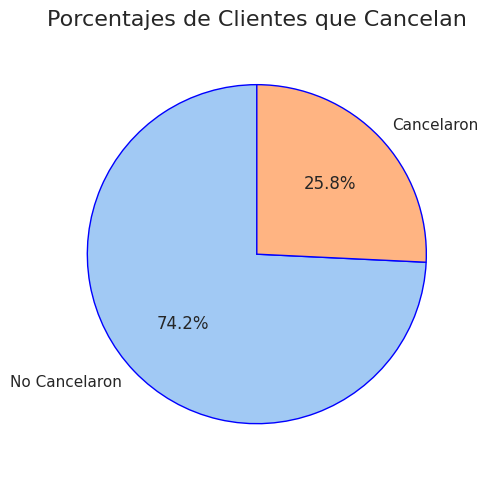

In [43]:
sns.set_theme(style="whitegrid")

# Datos para el pie chart
valores = datos['Cancelación'].value_counts()
etiquetas = ['No Cancelaron', 'Cancelaron']
colores = sns.color_palette("pastel")[:3]  # Colores suaves

# Gráfico circular
plt.figure(figsize=(5, 5))
plt.pie(valores, labels=etiquetas, autopct='%1.1f%%', startangle=90, colors=colores, wedgeprops={'edgecolor': 'blue'})
plt.title('Porcentajes de Clientes que Cancelan', fontsize=16)
plt.axis('equal')
plt.tight_layout()

plt.savefig("Porcentajes_Cancelacion.png", dpi=300, bbox_inches='tight')

plt.show()

##Comparación de cancelación vs tiempo y gasto mensual y diario

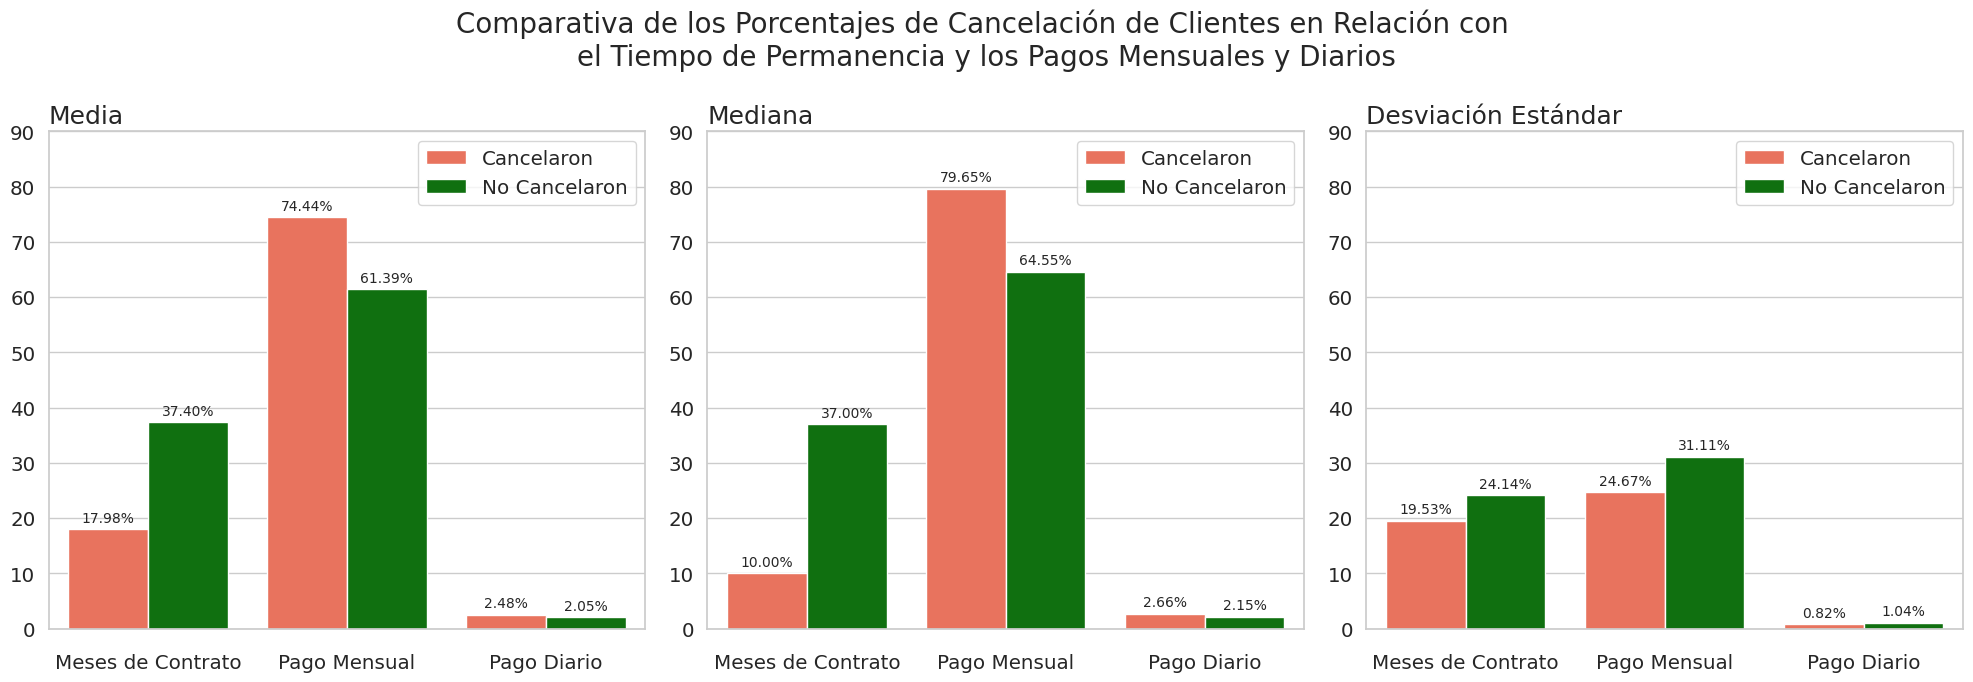

In [45]:
#Ahora voy a graficar los valores de media, mediana y Desviación estándar

sns.set_theme(style="whitegrid")  # Clásico limpio con líneas
sns.set_theme(style="whitegrid", font_scale=1.1)
colores = sns.color_palette("pastel")[:3]
sns.set_context("notebook", font_scale=1.3)

# Columnas a comparar
cols = ['Meses_Contrato', 'Cuentas_Mensuales', 'Cuentas_Diarias']

nombres_personalizados = {
    'Meses_Contrato': 'Meses de Contrato',
    'Cuentas_Mensuales': 'Pago Mensual',
    'Cuentas_Diarias': 'Pago Diario'
}

# Función para calcular estadísticas por grupo
def resumen_estadisticas(datos, columnas):
    lista = []
    for col in columnas:
        cancelaron = datos[datos['Cancelación'] == 1][col]
        no_cancelaron = datos[datos['Cancelación'] == 0][col]

        lista.append(['Media', col, 'Cancelaron', cancelaron.mean()])
        lista.append(['Media', col, 'No Cancelaron', no_cancelaron.mean()])
        lista.append(['Mediana', col, 'Cancelaron', cancelaron.median()])
        lista.append(['Mediana', col, 'No Cancelaron', no_cancelaron.median()])
        lista.append(['Desviación Estándar', col, 'Cancelaron', cancelaron.std()])
        lista.append(['Desviación Estándar', col, 'No Cancelaron', no_cancelaron.std()])

    df = pd.DataFrame(lista, columns=['Estadistica', 'Variable', 'Grupo', 'Valor'])
    return df

# Calculo el resumen
df_resumen = resumen_estadisticas(datos, cols)

# Crear gráfico con subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 7), sharey=False)

# Gráficos por estadística
estadisticas = ['Media', 'Mediana', 'Desviación Estándar']
colores = {'Cancelaron': 'tomato', 'No Cancelaron': 'green'}

for i, estadistica in enumerate(estadisticas):
    df_plot = df_resumen[df_resumen['Estadistica'] == estadistica].copy()
    df_plot['Variable'] = df_plot['Variable'].map(nombres_personalizados)

    sns.barplot(data=df_plot, x='Variable', y='Valor', hue='Grupo',
                palette=colores, ax=axes[i])

    axes[i].set_title(estadistica, fontsize = 18, loc ='left')


    # Ajusto el eje Y según el tipo de estadística
    if estadistica == 'Media':
        axes[i].set_ylim(0, 90)
    elif estadistica == 'Mediana':
        axes[i].set_ylim(0, 90)
    elif estadistica == 'Desviación Estándar':
        axes[i].set_ylim(0, 90)

    axes[i].set_ylabel('',)
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x',size = 14)
    axes[i].legend(title = '',loc='upper right')

    # Mostrar los valores encima de las barras
    for container in axes[i].containers:
        axes[i].bar_label(container, fmt='%.2f%%', label_type='edge', padding=3, fontsize = 10)

# Título general y ajuste del espacio superior
plt.suptitle('Comparativa de los Porcentajes de Cancelación de Clientes en Relación con \nel Tiempo de Permanencia y los Pagos Mensuales y Diarios', fontsize=20)
plt.subplots_adjust(top=1)
plt.tight_layout()

plt.savefig("Comparacion_PagoXMes-Dia-y-Tiempo.png", dpi=300, bbox_inches='tight')


plt.show()

Con esta Gráfica se deduce que:

*- Los clientes que Cancelaron, tenían un porcentaje de cobro mensual y diario, más elevado que el de los clientes NO cancelaron.


## Comparacion de Cancelación por Tipo de Servicios

In [46]:
#Procedo a crear la lista de los servicios a comparar
servicios = ['Teléfono_Servicio ', 'Múltiples_Lineas', 'DSL', 'Fibra_optica']

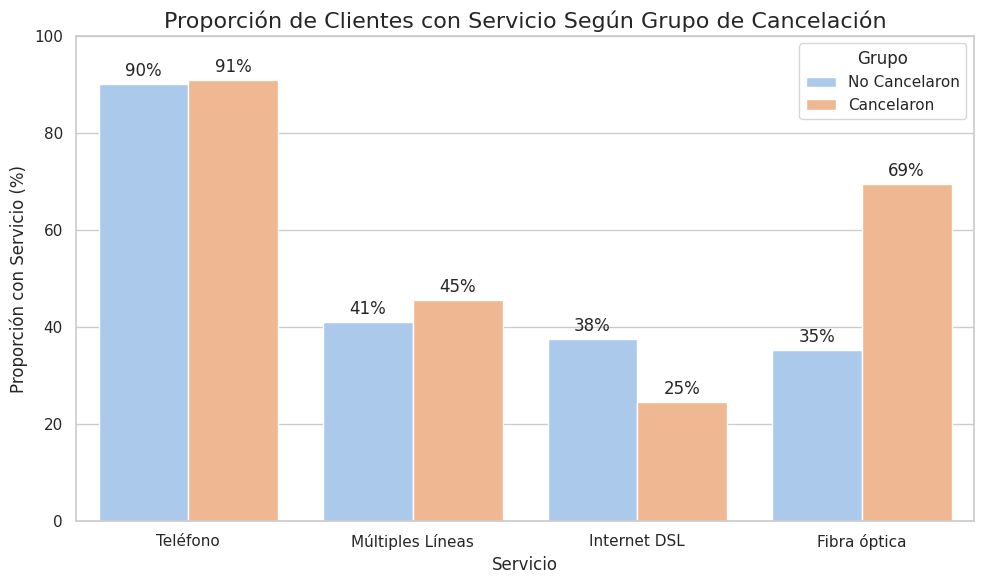

In [48]:
sns.set_theme(style="whitegrid")

# Servicios a analizar
servicios = ['Teléfono_Servicio', 'Múltiples_Lineas', 'DSL', 'Fibra_Optica']

nombres_barras = {
    'Teléfono_Servicio': 'Teléfono',
    'Múltiples_Lineas': 'Múltiples Líneas',
    'DSL': 'Internet DSL',
    'Fibra_Optica': 'Fibra óptica'
}

# Preparar DataFrame con proporciones por grupo
df_resultados = []

for servicio in servicios:
    for grupo in [0, 1]:  # 0 = No Cancelaron, 1 = Cancelaron
        subset = datos[datos['Cancelación'] == grupo]
        total = len(subset)
        con_servicio = subset[servicio].sum()
        proporción = (con_servicio / total) * 100 if total > 0 else 0  # → en porcentaje

        df_resultados.append([
            nombres_barras[servicio],
            'Cancelaron' if grupo == 1 else 'No Cancelaron',
            proporción
        ])

df_servicios = pd.DataFrame(df_resultados, columns=['Servicio', 'Grupo', 'Proporción'])

# Grafico
plt.figure(figsize=(10, 6))

sns.barplot(
    data=df_servicios,
    x='Servicio',
    y='Proporción',
    hue='Grupo',
    palette='pastel',
    errorbar=None
)

plt.title('Proporción de Clientes con Servicio Según Grupo de Cancelación', fontsize=16)
plt.xlabel('Servicio')
plt.ylabel('Proporción con Servicio (%)')
plt.ylim(0, 100)

# Etiquetas de porcentaje sobre cada barra
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%.0f%%', label_type='edge', padding=3)

plt.tight_layout()
plt.show()

Es Notable que:

*- En la grafica Teléfono existe una ligera diferencia entre los servicios cancelados y los que no cancelaron.

*- Con respecto a las líneas múltiples hay una ligera relación de cancelación por parte de los clientes.

*- La proporción de clientes que Cancelaron el servicio es mayor con respecto al internet de Fibra óptica.

*- Por otro lado al Servicio de DSL cuyo porcentaje es ligeramente mayor en los clientes que se quedaron.

In [62]:
#Servicios Adicionales de Internet
servicios_adicionales = ['Seguridad_En_Linea', 'Backup_En_Linea', 'Protección_Dispositivo', 'Soporte_Técnico', 'Transmisión_TV', 'Transmisión_Peliculas']

nombres_adicionales = {
    'Seguridad_En_Linea': 'Seguridad En Linea',
    'Backup_En_Linea': 'Backup En Linea',
    'Protección_Dispositivo': 'Protección Dispositivo',
    'Soporte_Técnico': 'Soporte técnico',
    'Transmisión_TV': 'Transmisión TV',
    'Transmisión_Peliculas': 'Transmisión Peliculas'
       }
servicios = ['Teléfono_Servicio', 'Múltiples_Lineas', 'DSL', 'Fibra_Optica']

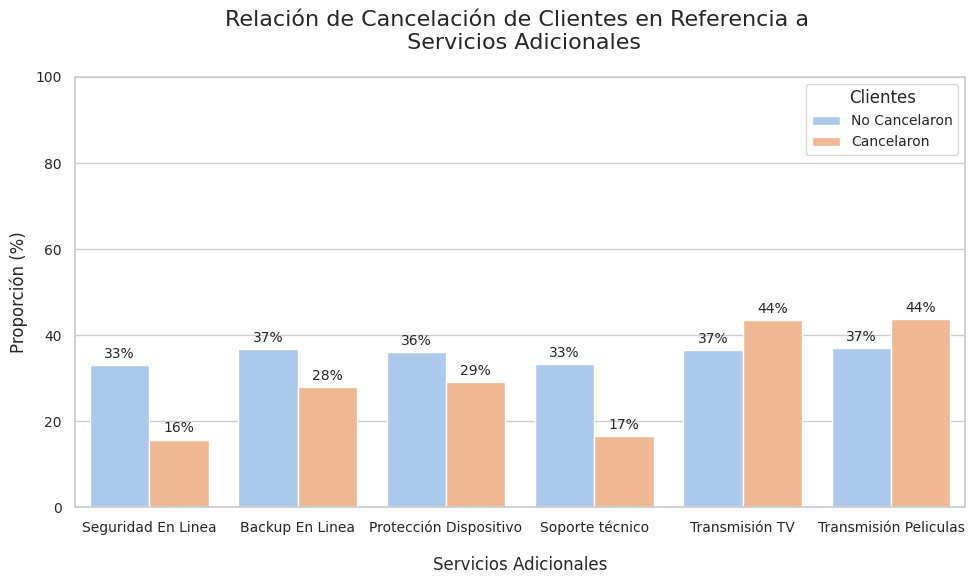

In [67]:
# DataFrame por grupo
df_adicionales = []

for adicional in servicios_adicionales:
    for grupo in [0, 1]:  # 0 = No Cancelaron, 1 = Cancelaron
        subset = datos[datos['Cancelación'] == grupo]
        total = len(subset)
        con_el_servicio = subset[adicional].sum()
        proporcion = (con_el_servicio / total) * 100 if total > 0 else 0  # → en porcentaje

        df_adicionales.append([
            nombres_adicionales[adicional],
            'Cancelaron' if grupo == 1 else 'No Cancelaron',
            proporcion
        ])

df_serv_adicionales = pd.DataFrame(df_adicionales, columns=['Adicional', 'Grupo', 'Proporción'])

# Grafico
plt.figure(figsize=(10, 6))

sns.barplot(
    data=df_serv_adicionales,
    x='Adicional',
    y='Proporción',
    hue='Grupo',
    palette='pastel',
    errorbar=None
)

plt.title('Relación de Cancelación de Clientes en Referencia a \n Servicios Adicionales', fontsize=16, pad = 20)
plt.xlabel('Servicios Adicionales', labelpad = 15)
plt.ylabel('Proporción (%)', labelpad = 5)
plt.ylim(0, 100)
plt.legend(title='Clientes', fontsize = 10)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

# Etiquetas de porcentaje sobre cada barra
for cont in plt.gca().containers:
    container = cont # Asignar a una variable temporal
    plt.bar_label(container, fmt='%.0f%%', label_type='edge', padding=3, fontsize = 10)

plt.tight_layout()
plt.show()

Este análisis sugiere que ofrecer y promover servicios de seguridad y soporte podría ser una estrategia para retener clientes, mientras que se debería investigar más a fondo la relación con los servicios de transmisión.

##Comparativa de cancelación por tipo de pago

In [73]:
#Lista con los campos a comparar
forma_pago = ['Pago_Transf_Banco', 'Pago_T.Crédito_Auto', 'Pago_Cheque_Electrónico', 'Pago_Cheque_Correo']

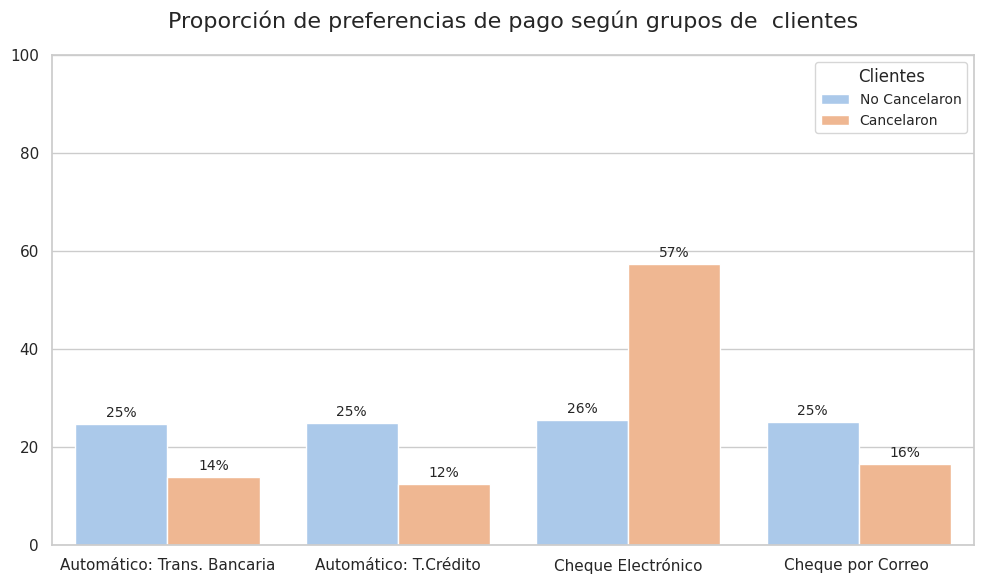

In [74]:
sns.set_theme(style="whitegrid")

#nombres para las barras
nombres_metodos = {
    'Pago_Transf_Banco': 'Automático: Trans. Bancaria',
    'Pago_T.Crédito_Auto': 'Automático: T.Crédito',
    'Pago_Cheque_Electrónico': 'Cheque Electrónico',
    'Pago_Cheque_Correo': 'Cheque por Correo '
}

# Preparar DataFrame con proporciones por grupo
df_pagos = []

for metodo in forma_pago:
    for grupo in [0, 1]:  # 0 = No Cancelaron, 1 = Cancelaron
        subset = datos[datos['Cancelación'] == grupo]
        total = len(subset)
        preferencia_pago = subset[metodo].sum()
        proporcion = (preferencia_pago / total) * 100 if total > 0 else 0  # → en porcentaje

        df_pagos.append([
            nombres_metodos[metodo],
            'Cancelaron' if grupo == 1 else 'No Cancelaron',
            proporcion
        ])

df_forma_pago = pd.DataFrame(df_pagos, columns=['Metodo', 'Grupo', 'Proporcion'])

# Grafico
plt.figure(figsize=(10, 6))

sns.barplot(
    data=df_forma_pago,
    x='Metodo',
    y='Proporcion',
    hue='Grupo',
    palette='pastel',
    errorbar=None
)

plt.title('Proporción de preferencias de pago según grupos de  clientes', fontsize=16, pad = 20)
plt.xlabel('')
plt.ylabel('')
plt.legend(title='Clientes', fontsize = 10)

plt.ylim(0, 100)

# Etiquetas de porcentaje sobre cada barra
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%.0f%%', label_type='edge', padding=3, fontsize = 10)

plt.savefig("grafico_metodos de pago.png", dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

Sin duda las personas con pagos automaticos tienen una permanencia constante.

##Comparativa por Tipo de Contrato

In [76]:
#Se agrupa los tipos de contrato
Contratos = ['Contrato_Mensual', 'Contrato_Anual', 'Contrato_Bianual']

#Diccionario con Nombres de las Etiquetas
Nombres_Contratos = {
    'Contrato_Mensual': 'Contrato mes a mes',
    'Contrato_Anual': 'Contrato a 1 año',
    'Contrato_Bianual': 'Contrato a 2 años',
}

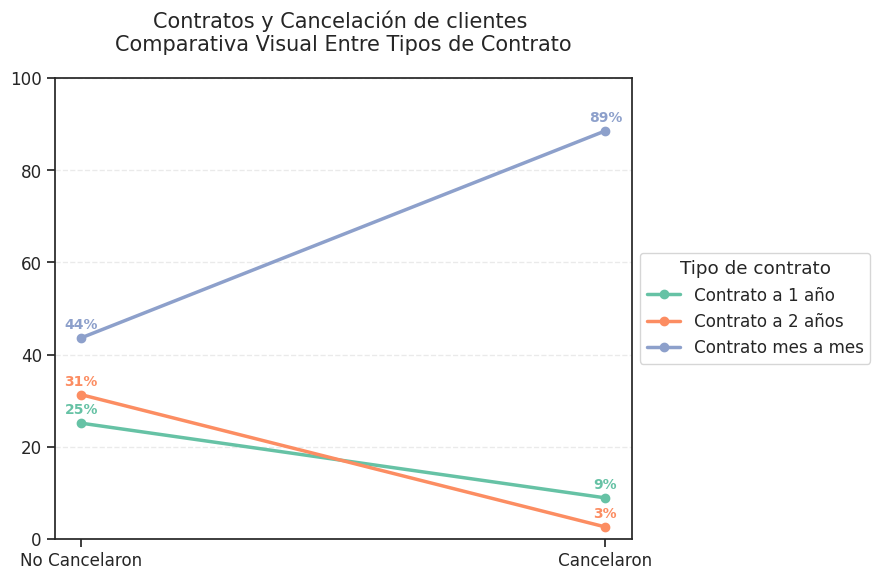

In [77]:
# haré una gráfica tipo slope

sns.set_theme(style="ticks", font_scale=1.1)


datos_slope = []
for contrato in Contratos:
    for grupo in [0, 1]:  # 0 = No Cancelaron, 1 = Cancelaron
        subset = datos[datos['Cancelación'] == grupo]
        total = len(subset)
        con_contrato = subset[contrato].sum()
        proporcion = (con_contrato / total) * 100 if total > 0 else 0

        datos_slope.append([
            Nombres_Contratos[contrato],
            'No Cancelaron' if grupo == 0 else 'Cancelaron',
            proporcion
        ])

df_slope = pd.DataFrame(datos_slope, columns=['Contrato', 'Grupo', 'Proporción'])
pivot = df_slope.pivot(index='Contrato', columns='Grupo', values='Proporción')

# Grafico
plt.figure(figsize=(9, 6))
colores = sns.color_palette("Set2", n_colors=len(pivot))

for (contrato, fila), color in zip(pivot.iterrows(), colores):
    plt.plot(['No Cancelaron', 'Cancelaron'],
             [fila['No Cancelaron'], fila['Cancelaron']],
             marker='o', linewidth=2.5, color=color, label=contrato)

    # Etiquetas en los puntos
    plt.text('No Cancelaron', fila['No Cancelaron'] + 2, f"{fila['No Cancelaron']:.0f}%",
             ha='center', fontsize=10, weight='bold', color=color)
    plt.text('Cancelaron', fila['Cancelaron'] + 2, f"{fila['Cancelaron']:.0f}%",
             ha='center', fontsize=10, weight='bold', color=color)

# Estética del gráfico
plt.title('Contratos y Cancelación de clientes \nComparativa Visual Entre Tipos de Contrato',
          fontsize=15, loc='center', pad=20)
plt.ylabel('')
plt.ylim(0, 100)
plt.xticks(['No Cancelaron', 'Cancelaron'])
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.legend(title='Tipo de contrato', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()

plt.savefig("grafico_tipo_contrato.png", dpi=300, bbox_inches='tight')

plt.show()

Contratos de 1 a 2 años, poseen mayor retención de clientes

##Cancelación por tipo de clientes

In [83]:
clientes = ['Género','Jubilado','Dependientes']

# Defino los valores
tipos_clientes = {
      'Género': {0: 'Hombre', 1: 'Mujer'},
      'Jubilado': {0: 'No', 1: 'SI'},
    'Dependientes': {0: 'Sin dependientes', 1: 'Con dependientes'}
}

In [84]:
# Agrupo los conteos
datos_clientes = []

for var in clientes:
    nombre_legible = var

    for estado in [0, 1]:
        for grupo in [0, 1]:  # 0 = No Cancelaron, 1 = Cancelaron
            subset = datos[(datos[var] == estado) & (datos['Cancelación'] == grupo)]
            total = len(subset)
            datos_clientes.append([

                f"{var}: {tipos_clientes[var][estado]}",
                'Cancelaron' if grupo == 1 else 'No Cancelaron',
                total
            ])

df_clientes = pd.DataFrame(datos_clientes, columns=['Grupo', 'Estado', 'Cantidad'])


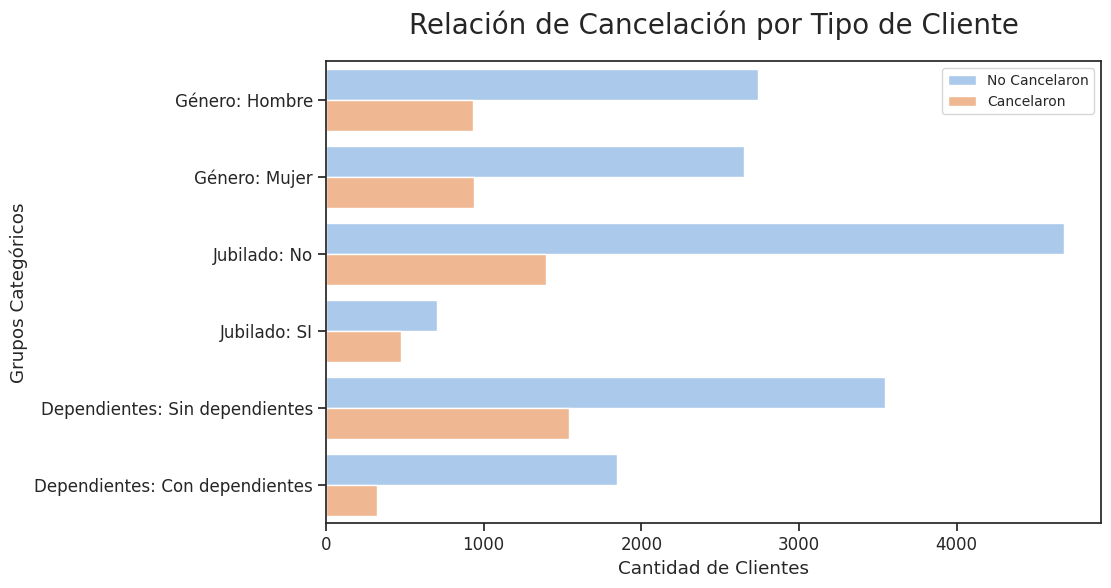

In [85]:
# Se procede a Graficar
plt.figure(figsize=(10, 6))
sns.barplot(data=df_clientes, y='Grupo', x='Cantidad', hue='Estado', palette='pastel')

plt.title('Relación de Cancelación por Tipo de Cliente', fontsize=20, pad=20)
plt.xlabel('Cantidad de Clientes')
plt.ylabel('Grupos Categóricos')
plt.xticks(fontsize=12)
plt.legend(fontsize=10)
plt.show()

Se determina que la mayor cantidad de clientes estan en el grupo de clientes que no están jubiladas a continuación el detalle

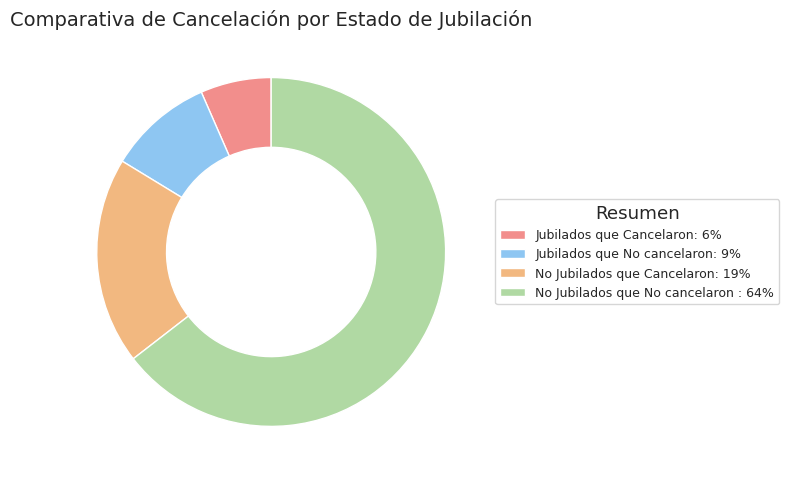

In [89]:
# Defino etiquetas y colores
etiquetas = [
    'Jubilados que Cancelaron',
    'Jubilados que No cancelaron',
    'No Jubilados que Cancelaron',
    'No Jubilados que No cancelaron '
]

valores = [
    len(datos[(datos['Jubilado'] == 1) & (datos['Cancelación'] == 1)]),
    len(datos[(datos['Jubilado'] == 1) & (datos['Cancelación'] == 0)]),
    len(datos[(datos['Jubilado'] == 0) & (datos['Cancelación'] == 1)]),
    len(datos[(datos['Jubilado'] == 0) & (datos['Cancelación'] == 0)])
]

# Calcular porcentajes
porcentajes = [v / sum(valores) * 100 for v in valores]
etiquetas_con_porcentaje = [
    f'{label}: {int(p)}%' for label, p in zip(etiquetas, porcentajes)
]

colores = ['#F28E8C', '#8EC6F2', '#F2B880', '#B0D9A3']

# Gráfica
fig, ax = plt.subplots(figsize=(7, 5))

# Gráfico sin etiquetas flotantes
wedges, _ = ax.pie(
    valores,
    startangle=90,
    colors=colores,
    wedgeprops=dict(width=0.4, edgecolor='white')
)

# Leyenda con porcentaje
ax.legend(wedges, etiquetas_con_porcentaje,
          title="Resumen", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=9)

plt.title('Comparativa de Cancelación por Estado de Jubilación', fontsize=14)
plt.tight_layout()

plt.savefig("clientes_jubilados.png", dpi=300, bbox_inches='tight')

plt.show()

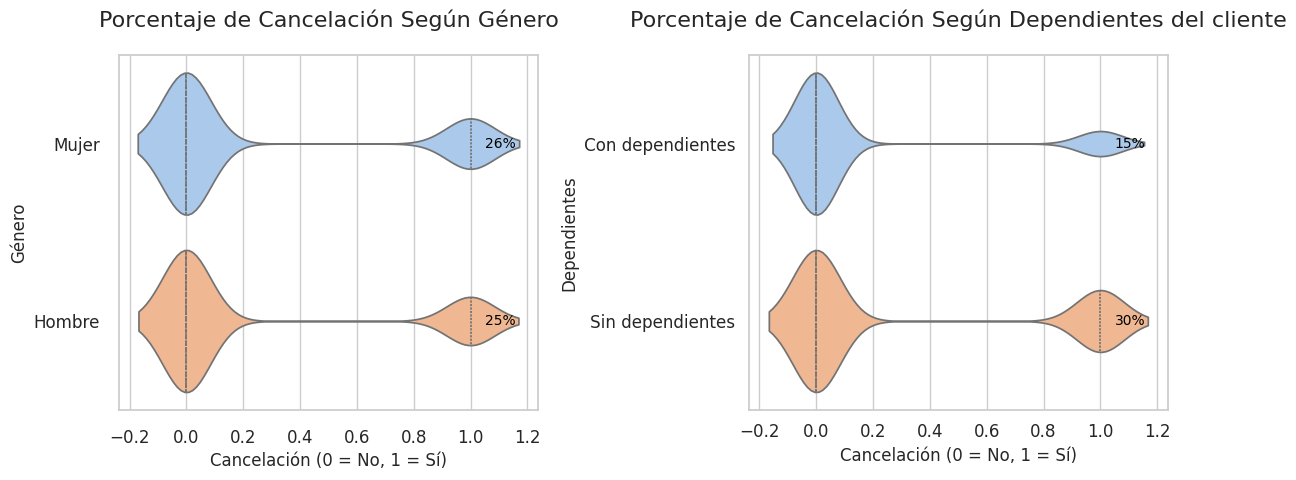

In [90]:
sns.set_theme(style="whitegrid", font_scale=1.1)

# Etiquetas legibles
datos['Género_txt'] = datos['Género'].map({0: 'Hombre', 1: 'Mujer'})
datos['Dependientes_txt'] = datos['Dependientes'].map({0: 'Sin dependientes', 1: 'Con dependientes'})

# subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True)

# Gráfico 1: Género
sns.violinplot(
    data=datos,
    x='Cancelación',
    y='Género_txt',
    hue='Género_txt',
    palette='pastel',
    inner='quartile',
    legend=False,
    ax=axes[0]
)
axes[0].set_title('Porcentaje de Cancelación Según Género', fontsize = 16, pad = 20)
axes[0].set_xlabel('Cancelación (0 = No, 1 = Sí)', fontsize = 12)
axes[0].set_ylabel('Género', fontsize = 12)
axes[0].tick_params(axis='x',size = 10)
axes[0].tick_params(axis='y',size = 10)



# Añadir porcentajes en el gráfico
for i, genero in enumerate(['Mujer', 'Hombre']):
    total = len(datos[datos['Género_txt'] == genero])
    cancelados = datos[(datos['Género_txt'] == genero) & (datos['Cancelación'] == 1)]
    porcentaje = (len(cancelados) / total) * 100
    axes[0].text(1.05, i, f'{porcentaje:.0f}%', va='center', fontsize=10, color='black')


# Gráfico 2: Dependientes
sns.violinplot(
    data=datos,
    x='Cancelación',
    y='Dependientes_txt',
    hue='Dependientes_txt',
    palette='pastel',
    inner='quartile',
    legend=False,
    ax=axes[1]
)
axes[1].set_title('Porcentaje de Cancelación Según Dependientes del cliente', fontsize = 16, pad = 20 )
axes[1].set_xlabel('Cancelación (0 = No, 1 = Sí)', fontsize = 12)
axes[1].set_ylabel('Dependientes', fontsize = 12)
axes[0].tick_params(axis='x',size = 10)
axes[0].tick_params(axis='y',size = 10)


# Añadir porcentajes manuales
for i, dep in enumerate(['Con dependientes', 'Sin dependientes']):
    total = len(datos[datos['Dependientes_txt'] == dep])
    cancelados = datos[(datos['Dependientes_txt'] == dep) & (datos['Cancelación'] == 1)]
    porcentaje = (len(cancelados) / total) * 100
    axes[1].text(1.05, i, f'{porcentaje:.0f}%', va='center', fontsize=10, color='black')


plt.tight_layout()

plt.savefig("genero_y_dependencia.png", dpi=300, bbox_inches='tight')

plt.show()


##Cancelación de Clientes por Tiempo de Contrato y Gasto Total

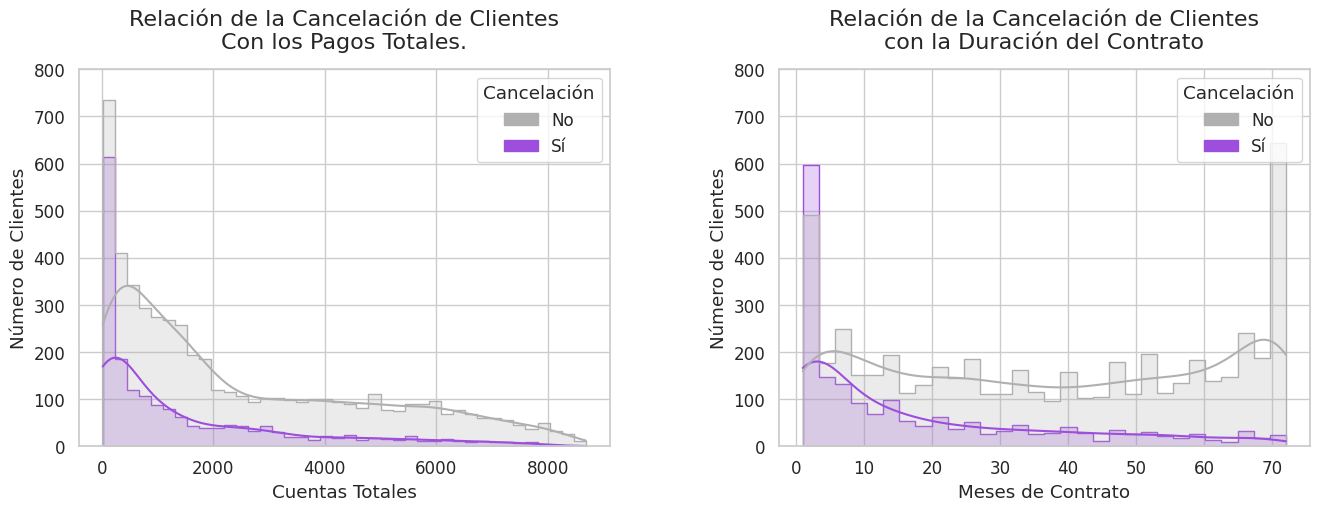

In [93]:
from matplotlib.patches import Patch

sns.set_theme(style="whitegrid", font_scale=1.1)

datos['Cancelación_txt'] = datos['Cancelación'].map({0: 'No', 1: 'Sí'})

custom_palette = {'No': '#B0B0B0', 'Sí': '#9D4EDD'}

ig, axes = plt.subplots(1, 2, figsize=(14, 5), constrained_layout={'w_pad': 0.5})

# Gráfico 1 -> Gasto total.
sns.histplot(
    data=datos,
    x='Cuentas_Totales',
    hue='Cancelación_txt',
    hue_order=['No', 'Sí'],
    palette=custom_palette,
    bins=40,
    kde=True,
    ax=axes[0],
    element='step'
)

axes[0].set_title('Relación de la Cancelación de Clientes\nCon los Pagos Totales.',fontsize = 16, pad = 15)
axes[0].set_xlabel('Cuentas Totales')
axes[0].set_ylabel('Número de Clientes')
legend_elements = [
    Patch(facecolor='#B0B0B0', edgecolor='#B0B0B0', label='No'),
    Patch(facecolor='#9D4EDD', edgecolor='#9D4EDD', label='Sí')
    ]
axes[0].legend(handles=legend_elements, title='Cancelación')
axes[0].set_ylim(0, 800)

# Gráfico 1 -> Meses contratados
sns.histplot(
    data=datos,
    x='Meses_Contrato',
    hue='Cancelación_txt',
    hue_order=['No', 'Sí'],
    palette=custom_palette,
    bins=30,
    kde=True,
    ax=axes[1],
    element='step'
)

axes[1].set_title('Relación de la Cancelación de Clientes\ncon la Duración del Contrato', fontsize = 16, pad = 15)
axes[1].set_xlabel('Meses de Contrato')
axes[1].set_ylabel('Número de Clientes')
axes[1].legend(handles=legend_elements, title='Cancelación', loc = 'upper right')
axes[1].set_ylim(0, 800)

plt.savefig("grafico_cuentas_tiempo.png", dpi=300, bbox_inches='tight')


# Mostrar gráfico
plt.show()

##Correlación de cancelación con diferentes variables

In [94]:
datos.columns.tolist()

['Cancelación',
 'Género',
 'Jubilado',
 'Pareja',
 'Dependientes',
 'Meses_Contrato',
 'Teléfono_Servicio',
 'Múltiples_Lineas',
 'DSL',
 'Fibra_Optica',
 'Seguridad_En_Linea',
 'Backup_En_Linea',
 'Protección_Dispositivo',
 'Soporte_Técnico',
 'Transmisión_TV',
 'Transmisión_Peliculas',
 'Facturación_Electrónica',
 'Contrato_Mensual',
 'Contrato_Anual',
 'Contrato_Bianual',
 'Pago_Transf_Banco',
 'Pago_T.Crédito_Auto',
 'Pago_Cheque_Electrónico',
 'Pago_Cheque_Correo',
 'Cuentas_Mensuales',
 'Cuentas_Totales',
 'Cuentas_Diarias',
 'Género_txt',
 'Dependientes_txt',
 'Cancelación_txt']

In [95]:
#Se Seleccionan las variables a analizar.
variables_corr = [
    'Cancelación',
    'Meses_Contrato',
    'Teléfono_Servicio',
    'DSL',
    'Fibra_Optica',
    'Cuentas_Mensuales',
    'Cuentas_Totales',
    'Cuentas_Diarias',
    'Contrato_Mensual',
    'Contrato_Anual',
    'Contrato_Bianual',
    'Pago_Transf_Banco',
    'Pago_T.Crédito_Auto',
    'Pago_Cheque_Electrónico',
    'Pago_Cheque_Correo'
]

#Se crea un dicionario para los nombres de las variables
nombres_correlacion  = {
    'Cancelación': 'Cancelación',
    'Meses_contrato': 'Meses de Contrato',
    'Teléfono_Servicio': 'Servicio Telefónico',
    'DSL': 'Internet DSL',
    'Fibra_Optica' : 'Internet Fibra óptica',
    'Cuentas_Mensuales':'Pago Mensual',
    'Cuentas_Totales': 'Total Pagado',
    'Cuentas_Diarias': 'Coste Diario',
    'Contrato_Mensual': 'Contrato Mensual',
    'Contrato_Anual': 'Contrato cada 1 año',
    'Contrato_Bianual': 'Contrato cada 2 años',
    'Pago_Transf_Banco': 'Pago Automático: Transf. Bancaria',
    'Pago_T.Crédito_Auto': 'Pago Automático: T.Crédito',
    'Pago_Cheque_Electrónico': 'Pago Cheque Electrónico',
    'Pago_Cheque_Correo': 'Pago Cheque por Correo'
          }

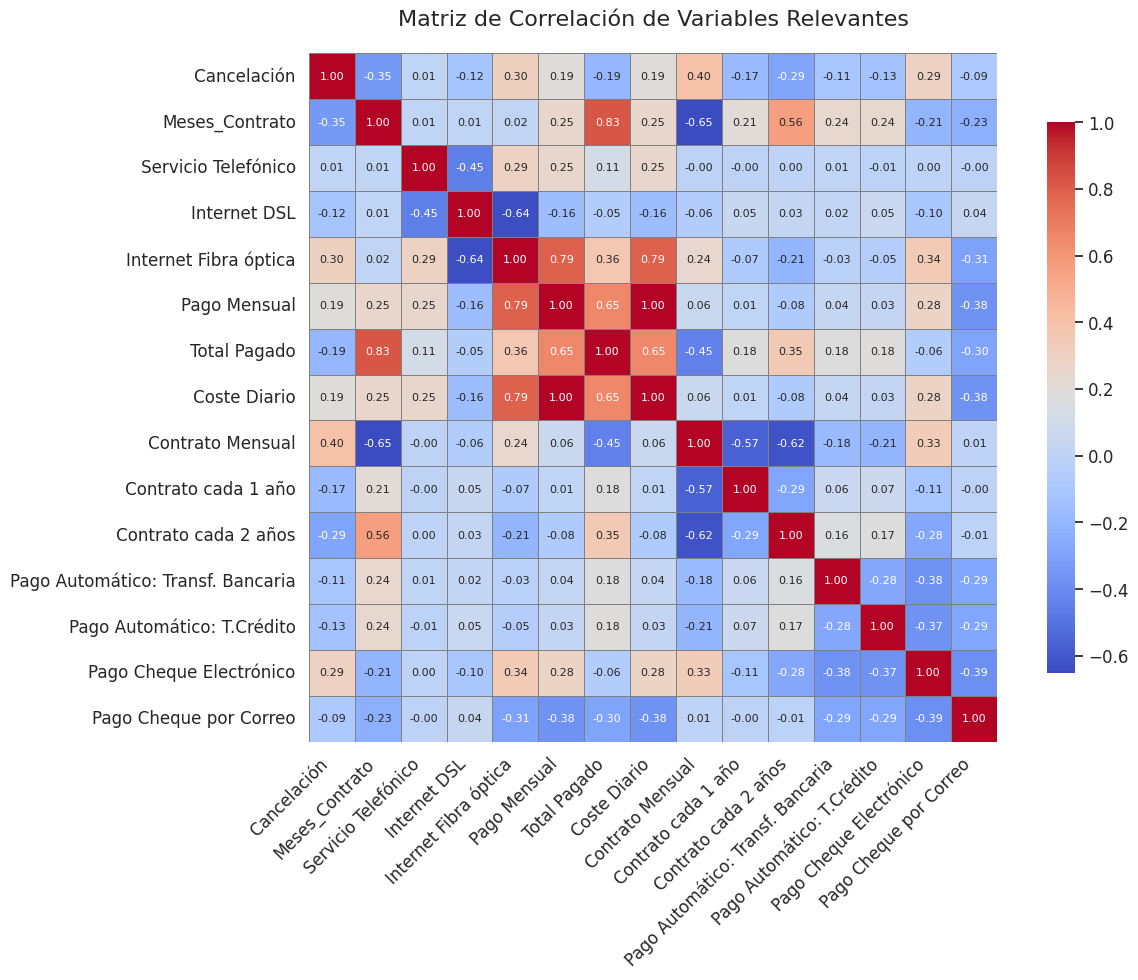

In [96]:
#Calcular matriz de correlación
matriz_corr = datos[variables_corr].corr()

#Renombro las Columnas/filas
matriz_corr.rename(columns=nombres_correlacion, index=nombres_correlacion, inplace=True)

#Se Grafica
plt.figure(figsize=(13, 10))
sns.heatmap(
    matriz_corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    linecolor='gray',
    square=True,
    cbar_kws={"shrink": 0.8},
    annot_kws={"size": 8}
)

plt.title('Matriz de Correlación de Variables Relevantes', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

plt.savefig("correlación_Cancelación.png", dpi=300, bbox_inches='tight')

plt.show()

In [98]:
# Extraer Correlación con 'Cancelación'
correlaciones_cancelación = matriz_corr.loc['Cancelación'].drop('Cancelación')

# Ordenar por valor absoluto (más influyentes)
top_correlaciones = correlaciones_cancelación.reindex(
    correlaciones_cancelación.abs().sort_values(ascending=False).index
)

# Mostrar
print("Variables Más Correlacionadas con Cancelación:\n")
print(top_correlaciones)


Variables Más Correlacionadas con Cancelación:

Contrato Mensual                     0.395067
Meses_Contrato                      -0.345799
Internet Fibra óptica                0.300416
Contrato cada 2 años                -0.294467
Pago Cheque Electrónico              0.294181
Total Pagado                        -0.194440
Coste Diario                         0.189393
Pago Mensual                         0.189393
Contrato cada 1 año                 -0.174340
Pago Automático: T.Crédito          -0.131448
Internet DSL                        -0.119945
Pago Automático: Transf. Bancaria   -0.114953
Pago Cheque por Correo              -0.089198
Servicio Telefónico                  0.012337
Name: Cancelación, dtype: float64


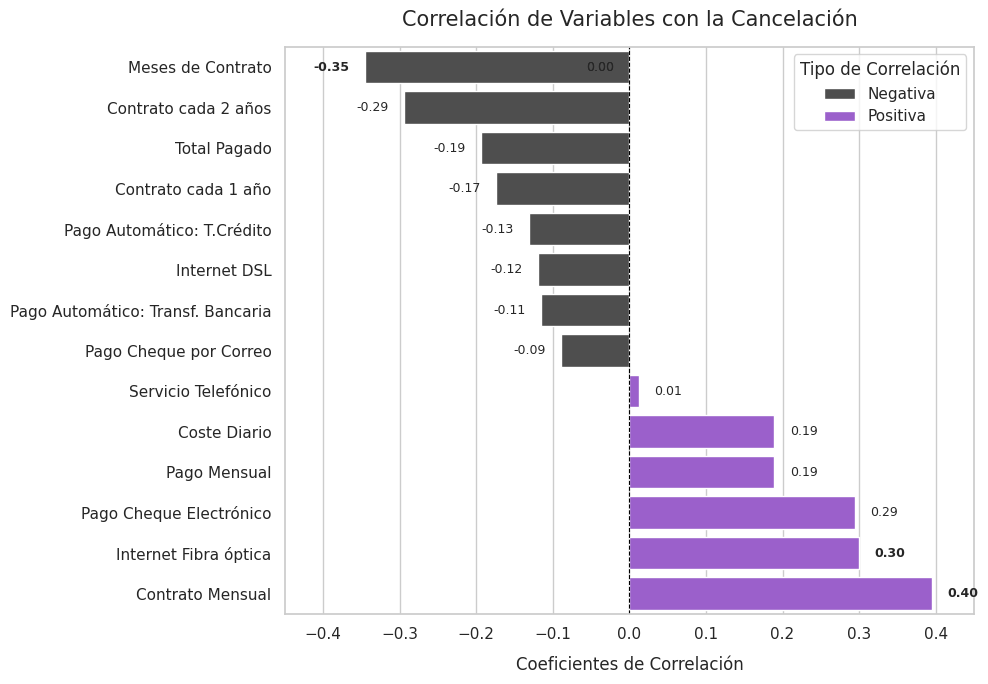

In [99]:
# Diccionario con los nombres para el gráfico
correlaciones = {
    'Contrato Mensual': 0.395067,
    'Meses de Contrato': -0.345799,
    'Internet Fibra óptica': 0.300416,
    'Contrato cada 2 años': -0.294467,
    'Pago Cheque Electrónico': 0.294181,
    'Total Pagado': -0.194440,
    'Coste Diario': 0.189393,
    'Pago Mensual': 0.189393,
    'Contrato cada 1 año': -0.174340,
    'Pago Automático: T.Crédito': -0.131448,
    'Internet DSL': -0.119945,
    'Pago Automático: Transf. Bancaria': -0.114953,
    'Pago Cheque por Correo': -0.089198,
    'Servicio Telefónico': 0.012337


}


# Crear DataFrame
df_corr = pd.DataFrame.from_dict(correlaciones, orient='index', columns=['Correlación'])
df_corr = df_corr.sort_values(by='Correlación').reset_index().rename(columns={'index': 'Variable'})
df_corr['Tipo'] = df_corr['Correlación'].apply(lambda x: 'Positiva' if x > 0 else 'Negativa')

# Se Grafíca
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 7))
plot = sns.barplot(
    data=df_corr,
    x='Correlación',
    y='Variable',
    hue='Tipo',
    dodge=False,
    palette={'Positiva': '#9D4EDD', 'Negativa': '#4E4E4E'}
)

# Títulos y límites
plt.title('Correlación de Variables con la Cancelación', fontsize=15, pad=15)
plt.xlabel('Coeficientes de Correlación', labelpad = 10)
plt.ylabel('')
plt.xlim(-0.45, 0.45)
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)
plt.legend(title='Tipo de Correlación')
plt.tight_layout()

# Agregar etiquetas con negrita para valores >= 0.30
for bar in plot.patches:
    width = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    variable = bar.get_y()  # posición
    value = width
    align = 'left' if width > 0 else 'right'
    offset = 0.02 if width > 0 else -0.02
    peso = 'bold' if abs(width) >= 0.30 else 'normal'
    plot.text(
        width + offset,
        y,
        f'{value:.2f}',
        va='center',
        ha=align,
        fontsize=9,
        fontweight=peso
    )

plt.savefig("top_correlacion_cancelación.png", dpi=300, bbox_inches='tight')


plt.show()

Las variables con mayor correlación positiva con la cancelación (es decir, que aumentan cuando hay cancelación) son el Contrato Mensual, el Internet de Fibra Óptica y el Pago con Cheque Electrónico.

Las variables con mayor correlación negativa (es decir, que disminuyen cuando hay cancelación) son los Meses de Contrato (antigüedad), el Contrato a 2 años y el Pago Total acumulado.

En resumen, los clientes con contratos mensuales, fibra óptica y que pagan con cheque electrónico, así como los que tienen menos tiempo con la empresa y han pagado menos en total, tienden a ser más propensos a cancelar.

#📄Informe final

#1. Introducción

Este cuaderno tiene como objetivo principal realizar un análisis exhaustivo del fenómeno de la cancelación de clientes (churn) en una empresa de telecomunicaciones. A través de un proceso de Extracción, Transformación y Carga (ETL), se limpian, preparan y exploran los datos para identificar los factores clave asociados a la cancelación.

El análisis incluye la exploración de la distribución de la cancelación, la comparación de diferentes tipos de servicios, métodos de pago y contratos, así como la evaluación de la relación entre la cancelación y el tiempo de permanencia y los gastos de los clientes. Finalmente, se presenta un análisis de correlación para identificar las variables más influyentes en la decisión de cancelar y se resumen las conclusiones y recomendaciones derivadas del análisis.

Este trabajo busca proporcionar insights valiosos para comprender por qué los clientes cancelan y sugerir estrategias para mejorar la retención de clientes.

#2. Limpieza y Tratamiento de Datos

*- Se realizó la importación del conjunto de datos original, seguido de un proceso exhaustivo de limpieza y transformación:

*- Se eliminaron columnas redundantes como Servicio_internet (ya representada por DSL y Fibra_optica).

*- Se estandarizaron las variables categóricas y se convirtieron en variables binarias (dummies).

*- Se crearon nuevas variables calculadas como "Cuentas_diarias" a partir de los pagos mensuales.

*- Se ajustaron los nombres de variables para facilitar su interpretación en las visualizaciones.

*- Se normalizaron los nombres de columnas para facilitar el análisis.

#3. Análisis Exploratorio de Datos

*- Distribución de Cancelación
Se observa un porcentaje significativo de cancelación, lo que justifica un análisis profundo.

*- Comparación de Medios de Pago
Ciertos métodos como el pago por cheque electrónico están más asociados con cancelaciones.


*- Tipo de Contrato
El contrato mensual tiene una correlación positiva con la cancelación, mientras que los contratos anuales o bianuales se asocian a mayor permanencia.


*- Cuentas Totales y Tiempo de Permanencia
Los clientes que cancelan suelen gastar menos y llevar menos tiempo en la compañía.


*- Tiempo de permanencia comparado con los gastos mensuales y diarios
Los clientes que abandonan el servicio suelen pagar más al mes y llevar menos tiempo en la compañía, esto sugiere que, aunque no cancelan inmediatamente, los usuarios con tarifas elevadas y poca fidelización terminan abandonando el servicio en menos de un año.


*- Tipos de servicio
Se percibe que los clientes que cancelan suelen tener el servicio de Internet con Fibra óptica


*- Matriz de Correlación
El gráfico que muestra las variables tienen mayor relación con la cancelación.


*- Gráfico de Correlaciones Ordenadas
Presenta de forma clara las variables que más se asocian positiva o negativamente con la cancelación.


#4. Conclusiones e Insights

❗Los clientes con contrato mensual, fibra óptica y pagos más frecuentes tienen una mayor probabilidad de cancelar el servicio.

❗Los clientes con contrato anual o bianual, pagos automáticos y mayor antigüedad tienden a permanecer más tiempo.

❗El método de pago y el tipo de contrato son factores especialmente influyentes, por que los clientes que usan el pago con cheque electrónico tienen mayor tasa de cancelación.

❗El coste diario y el pago mensual están positivamente correlacionados con la cancelación, lo que sugiere que los clientes con tarifas más altas o percepciones de coste elevado son más propensos a abandonar el servicio.

❗- El uso de internet por fibra óptica muestra una mayor asociación con la cancelación, mientras que los clientes con servicio DSL tienden a permanecer más tiempo. Este hallazgo puede deberse a factores como la percepción de calidad del servicio, tarifas u otras variables no observadas directamente.

#5. Recomendaciones

✅ Fomentar la transición hacia contratos de mayor duración mediante promociones o beneficios exclusivos.

✅ Incentivar el uso de métodos de pago automáticos, ya que se asocian a menor churn.

✅ Monitorear activamente a los clientes con alto coste diario o mensual, ya que presentan mayor riesgo de cancelación.

✅ Implementar beneficios de permanencia o reducción gradual de tarifas como incentivo para prolongar la relación contractual.

✅ Rediseñar los planes con fibra óptica para ofrecer mayor valor o soporte, ya que esta tecnología está asociada con mayor tasa de cancelación.

✅ Segmentar a los clientes con más riesgo de fuga para aplicar estrategias de retención personalizadas.

✅ Implementar alertas tempranas cuando un cliente cumple patrones de alto riesgo de churn.

